# SMS Classifier

**Import Libraries**

In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# From Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

**Load and Preprocess Data**

In [16]:
!curl "https://raw.githubusercontent.com/RebuniTech/Sms_SPam-detection/main/sms_dataset.tsv" --output sms_dataset.tsv
df = pd.read_csv('sms_dataset.tsv', sep='\t')
print("Total Dataset:", len(df))

X = df.message # X_feature
y = df.label # y_label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  501k  100  501k    0     0  2548k      0 --:--:-- --:--:-- --:--:-- 2560k
Total Dataset: 5572


**Checking for null values**

In [17]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

**Analysing number of data in dataset by plot**

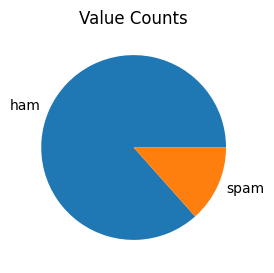

In [18]:
#plt.figure(, dpi=75)
df.label.value_counts().plot(kind='pie', figsize=(10, 3))
plt.title('Value Counts')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [19]:
#Using Naive Bayes
count_vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

count_vectorizer.fit(X_train)
X_train_cv = count_vectorizer.transform(X_train)
tfidf_transformer.fit(X_train_cv)
X_train_tfidf = tfidf_transformer.transform(X_train_cv)

X_test_cv = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_cv)

**Text Vectorization**

In [20]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


**Model Implementation**

In [24]:
naiv_bayes = MultinomialNB()
naiv_bayes.fit(X_train_tfidf, y_train)

prediction = naiv_bayes.predict(X_test_tfidf)


**Model Evaluation**

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



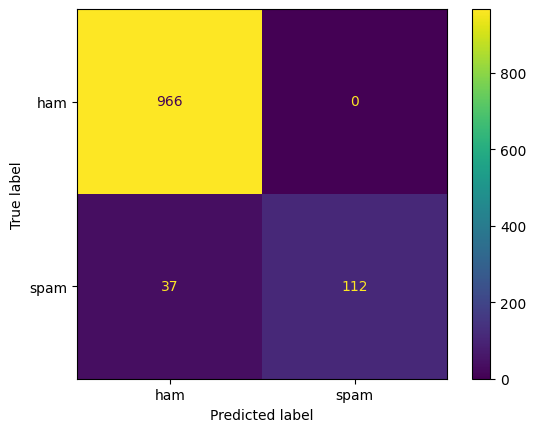

In [23]:

print(classification_report(y_test, prediction))

ConfusionMatrixDisplay.from_estimator(naiv_bayes, X_test_tfidf, y_test)
plt.show()

**Using Decision Tree**

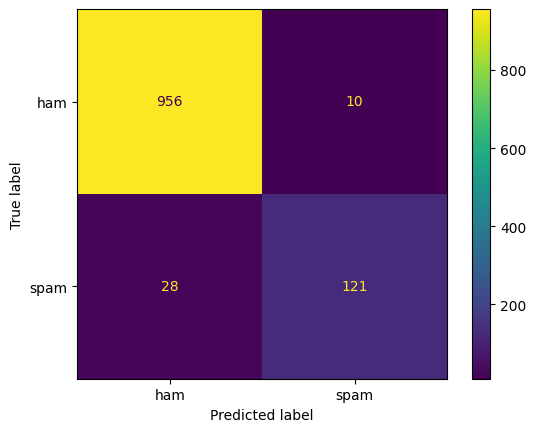

In [25]:
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train_tfidf, y_train)
prediction = dt_cls.predict(X_test_tfidf)
ConfusionMatrixDisplay.from_estimator(dt_cls, X_test_tfidf, y_test)
plt.show()

**Model Evaluation**

In [32]:
print(classification_report(y_test, prediction))
print("Accuracy: ", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       0.99      0.95      0.97       149

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Accuracy:  0.9919282511210762


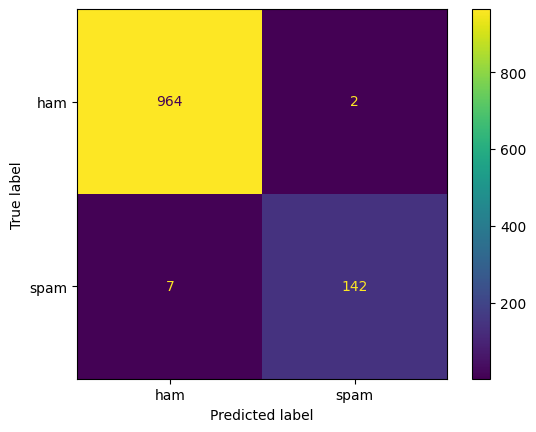

In [27]:
# Using Linear SVC

lsvc = LinearSVC()
svc = lsvc.fit(X_train_tfidf, y_train)
prediction = lsvc.predict(X_test_tfidf)
ConfusionMatrixDisplay.from_estimator(lsvc, X_test_tfidf, y_test)
plt.show()

**Model Evaluation**

In [31]:
print(classification_report(y_test, prediction))
print("Accuracy: ", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       0.99      0.95      0.97       149

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Accuracy:  0.9919282511210762
